In [1]:
# I copied notebook from previous exercise and only changed data input and legend in plot
# so the names of variables are misleading

In [2]:
# before You start working on data and creating plots 
# in R, check how it work first:
# http://ggplot2.tidyverse.org/reference/ggplot.html
install.packages("ggplot2")
library("ggplot2")

Installing package into ‘/home/michal/R/x86_64-pc-linux-gnu-library/3.4’
(as ‘lib’ is unspecified)


In [3]:
# operating on data that shows comparision evaluation time
# of interpolation functions written in C

# one function use Lagrange interpolation, second Newton and third one BLAS library
results = read.csv("InterpolationTime.csv")

In [4]:
# creating vector for blas results and blas mean
blas = results[results$Type == 0,]
avg_blas = aggregate(ClockTime ~ Intervals, data=blas, FUN=mean)

# creating vector for Lagrange results and Lagrange mean
lagrange = results[results$Type == 1,]
avg_lagrange = aggregate(ClockTime ~ Intervals, data=lagrange, FUN=mean)

# creating vector for Newton results and Newton mean
newton = results[results$Type == 2,]
avg_newton = aggregate(ClockTime ~ Intervals, data=newton, FUN=mean)

In [5]:
# adding standard deviation for blas method
avg_blas$sd = aggregate(ClockTime ~ Intervals, data=blas, FUN=sd)$ClockTime

# adding standard deviation for Lagrange method
avg_lagrange$sd = aggregate(ClockTime ~ Intervals, data=lagrange, FUN=sd)$ClockTime

# adding standard deviation for Newton method
avg_newton$sd = aggregate(ClockTime ~ Intervals, data=newton, FUN=sd)$ClockTime

In [15]:
# creating pComparision variable to store plot layers
pComparision = ggplot()

In [16]:
# adding to pComparision chart with "blas" data which also contains
# error bars

pComparision = pComparision +
geom_point(data = avg_blas, aes(Intervals, ClockTime, colour = "Polynomial")) +
geom_errorbar(data = avg_blas,
              aes(Intervals, ClockTime, ymin = ClockTime - sd, ymax = ClockTime + sd, colour = "Polynomial"),
              width = 2)

Warning message:
“Ignoring unknown aesthetics: y”

In [17]:
# doing the same thing for "lagrange" data

pComparision = pComparision +
geom_point(data = avg_lagrange, aes(Intervals, ClockTime, colour = "CSpline")) +
geom_errorbar(data = avg_lagrange,
              aes(Intervals, ClockTime, ymin = ClockTime - sd, ymax = ClockTime + sd, colour = "CSpline"),
              width = 2)

Warning message:
“Ignoring unknown aesthetics: y”

In [18]:
# doing the same thing for "newton" data

pComparision = pComparision +
geom_point(data = avg_newton, aes(Intervals, ClockTime, colour = "Akima")) +
geom_errorbar(data = avg_newton,
              aes(Intervals, ClockTime, ymin = ClockTime - sd, ymax = ClockTime + sd, colour = "Akima"),
              width = 2)

Warning message:
“Ignoring unknown aesthetics: y”

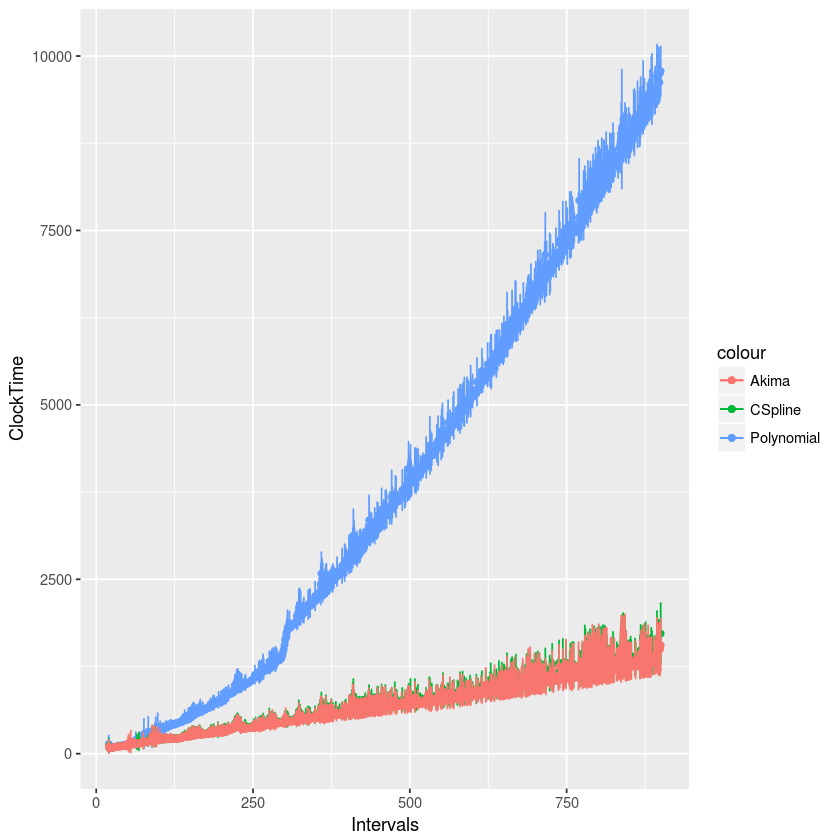

In [19]:
pComparision

In [20]:
# calculating curve fit for blas, lagrange and newton method
# I suspect that third degree polynomial fits lagrange and newton methods, but for third one  
fitBlas = lm(ClockTime ~ poly(Intervals, 3, raw=TRUE), data=avg_blas)
fitLagrange = lm(ClockTime ~ poly(Intervals, 3, raw=TRUE), data=avg_lagrange)
fitNewton = lm(ClockTime ~ poly(Intervals, 3, raw=TRUE), data=avg_newton)

In [21]:
# adding curve fit to blas method
avg_blas$fit = predict(fitBlas, avg_blas)

# adding curve fit to lagrange method
avg_lagrange$fit = predict(fitLagrange, avg_lagrange)

# adding curve fit to newton method
avg_newton$fit = predict(fitNewton, avg_newton)

In [22]:
# adding to pComparision curve fits
pComparision = pComparision +
geom_line(data = avg_blas, aes(Intervals, fit, colour = "Polynomial")) +
geom_line(data = avg_lagrange, aes(Intervals, fit, colour = "CSpline")) +
geom_line(data = avg_newton, aes(Intervals, fit, colour = "Akima"))

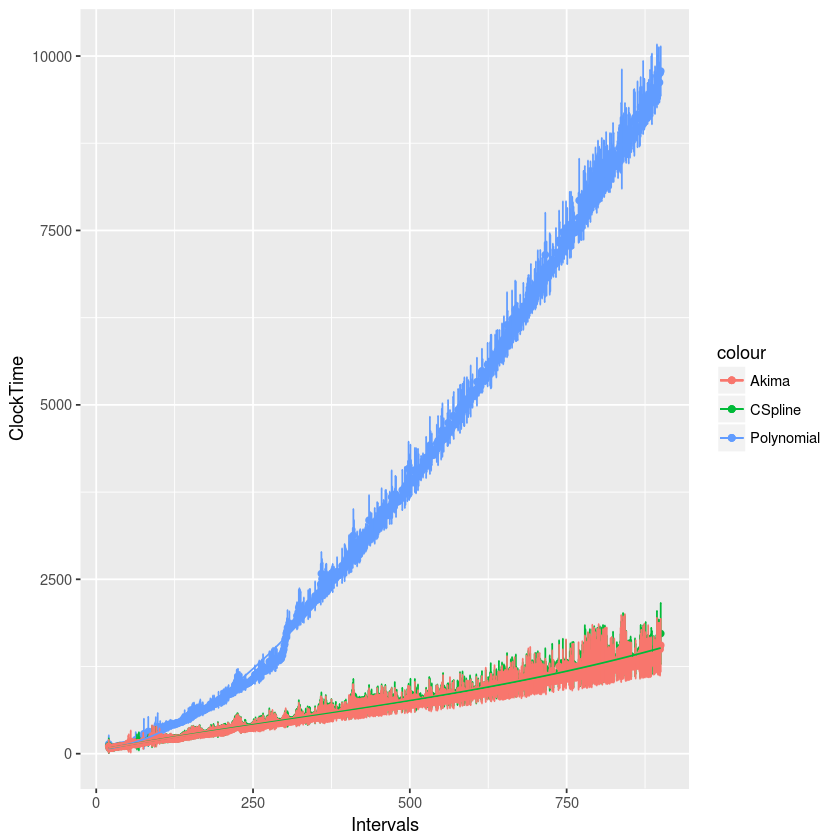

In [23]:
pComparision